Results show that the optimal solution is likely [0.18879063981746194, 0.3420116728566099], with a cost of -41.97

repeat with 50% more points, but interrupted early and with an error fixed, shows [0.18963631198709077, 0.32344411874624834] -30.811047097509547 

repeated over a smaller area gives ([0.1965124968503868, 0.3353395620895592], -41.63474736733871)

Again, with integer axis values gives a position of [.2,.33] and a value of 28 (using smaller total revs)

In [1]:
import skopt
from smallCombinerBigMagnets import *

In [2]:
sol=compute_Sol(5e-6,50,2000,50)

starting
herere 0 0 25
[0.41, 0.3] 8.468331922954393 49.90288660710302
herere 1 1 25
herere 2 1 25
herere 3 1 25
herere 4 1 25
herere 5 1 25
herere 6 1 25
herere 7 1 25
herere 8 1 25
herere 9 1 25
[0.04, 0.29] 5.542591680399818 49.951107660579524
herere 10 2 25
herere 11 2 25
[0.09, 0.24] 2.090869372115191 28.99991855203686
herere 12 3 25
herere 13 3 25
herere 14 3 25
herere 15 3 25
herere 16 3 25
herere 17 3 25
herere 18 3 25
herere 19 3 25
[0.09, 0.25] 7.843583992393311 49.9250445718575
herere 20 4 25
herere 21 4 25
herere 22 4 25
herere 23 4 25
[0.02, 0.28] 4.610758261415185 46.473326859221814
herere 24 5 25
herere 25 5 25
herere 26 5 25
herere 27 5 25
[0.12, 0.24] 12.317838954576143 50.05839511138158
herere 28 6 25
[0.09, 0.06] 4.800888946361939 49.913180969770124
herere 29 7 25
herere 30 7 25
herere 31 7 25
herere 32 7 25
herere 33 7 25
herere 34 7 25
herere 35 7 25
herere 36 7 25
herere 37 7 25
herere 38 7 25
[0.15, 0.12] 5.707989451611413 49.95776694365851
herere 39 8 25
herere 

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

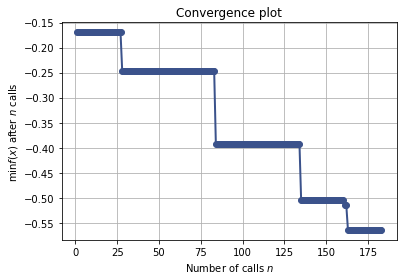

In [3]:
import skopt.plots
skopt.plots.plot_convergence(sol.skoptSol)

<AxesSubplot:>

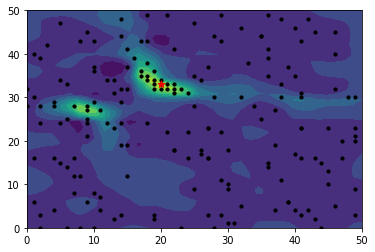

In [4]:
skopt.plots.plot_objective_2D(sol.skoptSol,0,1)

In [6]:
sol.x,sol.fun

([0.2, 0.33], 28.205981628826923)

In [10]:
%matplotlib tk
import scipy.interpolate as spi
x=sol.skoptSol.x_iters
y=sol.skoptSol.func_vals
x=np.asarray(x)
y=np.asarray(y)
func=sol.skoptSol.models[-1].predict#spi.Rbf(x[:,0],x[:,1],y,smooth=1e-1)#LinearNDInterpolator(x,y)

plotxArr=np.linspace(0,1,num=250)
plotyArr = np.linspace(0,1, num=250)
image=np.empty((plotxArr.shape[0],plotyArr.shape[0]))
for i in range(plotxArr.shape[0]):
    for j in range(plotyArr.shape[0]):
        image[j,i]=func([[plotxArr[i],plotyArr[j]]])
        
image=np.flip(image,axis=0)
plt.imshow(image,extent=[0,50.0,0,50.0])
plt.scatter(x[:,0],x[:,1],s=10,c='r')
plt.show()
x[y.argmin()],x[y.argmax()]

(array([17, 35]), array([16, 14]))

In [43]:
sol.skoptSol.models[-1].predict([[.1,.1]])

array([-0.04008991])

In [5]:
14000/3600

3.888888888888889

In [6]:
lattice=get_Lattice(trackPotential=True)
XOpt=[0.1965124968503868, 0.3353395620895592]
lattice.elList[2].forceFact=XOpt[0]
lattice.elList[4].forceFact = XOpt[1]
T0=100.0*lattice.totalLength/lattice.v0Nominal

In [7]:
optimizer=Optimizer(lattice)
swarm =optimizer.initialize_Random_Swarm_At_Combiner_Output(3e-3,5e0,100)
swarm=optimizer.trace_Swarm_Through_Lattice(swarm,5e-6,T0,parallel=True,fastMode=False)

In [12]:
for particle in swarm.particles[:]:
    qoArr=particle.qoArr
    qArr=particle.qArr
    EArr=particle.EArr
    TArr=particle.TArr
    VArr=particle.VArr
    if particle.revolutions>1:
        pass
        #lattice.show_Lattice(particleCoords=qArr[-1])
        #plt.plot(qoArr[:,0],TArr)
        #plt.show()
    print(particle.revolutions,particle.currentElIndex)

28.98103139434332 1
99.9231109466523 5
1.0098780436471673 2
11.99755381428585 1
99.85022732294092 5
5.990503982237514 1
99.90853796345044 5
99.87729442752493 5
99.8735956955332 5
97.00404508762612 2
44.00365688619909 2
99.86586424126398 5
1.9999869287855965 1
48.994192445644465 1
67.97411592541707 1
8.984307839814674 1
99.91088547389693 5
99.90228681927361 5
1.0036441543552865 2
98.61241580505222 5
56.00509489003919 2
13.976949673040002 1
88.97965904727069 1
73.99987700780127 1
46.513410641563034 4
68.99992884283692 1
93.00287969859457 2
3.9999048209032 1
66.97594730875976 1
4.978040023933146 1
9.53745577776635 5
99.90862940660098 5
1.0093572865474745 2
2.005980163616996 2
5.996167582773697 1
86.98551659307793 1
99.89758981666523 5
41.00704116893973 2
24.991785435820525 1
1.9999495919853645 1
3.987651553891079 1
8.007542357963079 2
51.99996789524301 1
69.98797247367837 1
97.97403038002467 1
5.999149260998043 1
4.002473442238548 2
1.9918536305924452 1
11.985909858364474 1
2.991115704438